[['/Users/elnuralimirzayev/Downloads/IEMOCAP_no_video/IEMOCAP_full_release/Session1/sentences/wav/Ses01M_impro01/Ses01M_impro01_M000.wav', 'Yes, me. Okay, okay here we go.'], ['/Users/elnuralimirzayev/Downloads/IEMOCAP_no_video/IEMOCAP_full_release/Session1/sentences/wav/Ses01M_impro01/Ses01M_impro01_F001.wav', 'My window is open.'], ['/Users/elnuralimirzayev/Downloads/IEMOCAP_no_video/IEMOCAP_full_release/Session1/sentences/wav/Ses01M_impro01/Ses01M_impro01_M001.wav', 'Okay, so filled out all these forms  --'], ['/Users/elnuralimirzayev/Downloads/IEMOCAP_no_video/IEMOCAP_full_release/Session1/sentences/wav/Ses01M_impro01/Ses01M_impro01_F002.wav', 'This is... Your last- Your first name is Jones?'], ['/Users/elnuralimirzayev/Downloads/IEMOCAP_no_video/IEMOCAP_full_release/Session1/sentences/wav/Ses01M_impro01/Ses01M_impro01_M002.wav', 'and I have This form of ID here so...'], ['/Users/elnuralimirzayev/Downloads/IEMOCAP_no_video/IEMOCAP_full_release/Session1/sentences/wav/Ses01M_impro01/

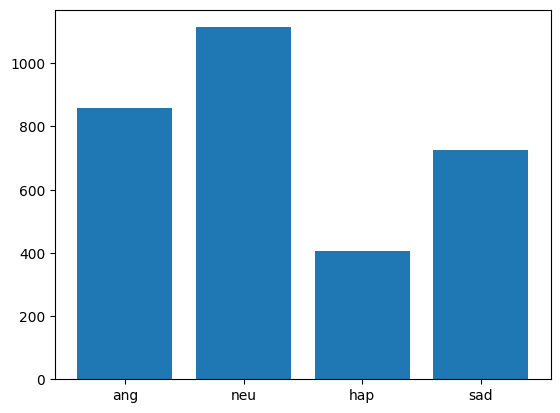

In [55]:
TRANSCRIPTIONS_DIR = "/Users/elnuralimirzayev/Downloads/IEMOCAP_no_video/IEMOCAP_full_release/Session{0}/dialog/transcriptions"
WAVS_DIR = "/Users/elnuralimirzayev/Downloads/IEMOCAP_no_video/IEMOCAP_full_release/Session{0}/sentences/wav"
EMO_EVAL_DIR = "/Users/elnuralimirzayev/Downloads/IEMOCAP_no_video/IEMOCAP_full_release/Session{0}/dialog/EmoEvaluation"
ALLOWED_EMOS = ["neu", "ang", "hap", "sad"]
MIN_WORDS = 3
AUDIOID_MIN_LEN = 3

import os
import re
from matplotlib import pyplot as plt

def get_transcriptions_and_wavfiles(script_dir: str, wav_dir: str):
    txt_files = list(filter(lambda file: \
                            file.endswith(".txt") and not file.startswith("."), \
                            os.listdir(script_dir)))
    sentences_wavs = []
    for file in txt_files:
        with open(os.path.join(script_dir, file)) as f:
            lines = f.readlines()
            for l in lines:
                audio_ref, sent = l.split(":", 1)
                audio_ref = os.path.join(wav_dir, audio_ref.split()[0].rsplit("_", 1)[0], audio_ref.split()[0] + ".wav")
                # Remove existing unknown tags (example: [LAUGHTER])
                sent = re.sub(r"\[(?<=\[)[A-Z]+(?=\])\]", "", sent)
                sent = sent.strip()
                sentences_wavs += [[audio_ref, sent]]
    sentences_wavs = list(filter(lambda item: \
                            len(item[1].split()) >= MIN_WORDS and len(os.path.splitext(os.path.basename(item[0]))[0]) >= AUDIOID_MIN_LEN, sentences_wavs))
    print(sentences_wavs)
    return sentences_wavs

def get_emo_evals(dir: str, pairs: list):
    eval_files = list(filter(lambda file: \
                            file.endswith(".txt") and not file.startswith("."), \
                            os.listdir(dir)))
    all_lines = []
    for file in eval_files:
        with open(os.path.join(dir, file)) as f:
            all_lines += f.readlines()
    for pair in pairs:
        emotion = list(filter(lambda line: os.path.splitext(os.path.basename(pair[0]))[0] in line, all_lines))
        if len(emotion) > 0:
            emotion = emotion[0].split("\t")[2]
            pair.append(emotion)
    return pairs

def filter_allowed_emos(items, allowed_emos):
    return list(filter(lambda item: len(item) == 3 and item[2] in allowed_emos, items))

def plot_emos_distribution(items):
    n_ang = len(filter_allowed_emos(items, ["ang"]))
    n_neu = len(filter_allowed_emos(items, ["neu"]))
    n_hap = len(filter_allowed_emos(items, ["hap"]))
    n_sad = len(filter_allowed_emos(items, ["sad"]))
    print(n_ang, n_neu, n_hap, n_sad)

    plt.bar(["ang", "neu", "hap", "sad"], [n_ang, n_neu, n_hap, n_sad])
    plt.show()

text_wav_pairs = []
for i in range(1, 5):
    text_wav_pairs_i = get_transcriptions_and_wavfiles(TRANSCRIPTIONS_DIR.format(i), WAVS_DIR.format(i))
    text_wav_pairs_i = get_emo_evals(EMO_EVAL_DIR.format(i), text_wav_pairs_i)
    text_wav_pairs += text_wav_pairs_i
print(len(text_wav_pairs))
text_wav_pairs = filter_allowed_emos(text_wav_pairs, ALLOWED_EMOS)
plot_emos_distribution(text_wav_pairs)


In [56]:
print(text_wav_pairs)

[['/Users/elnuralimirzayev/Downloads/IEMOCAP_no_video/IEMOCAP_full_release/Session1/sentences/wav/Ses01M_impro01/Ses01M_impro01_F001.wav', 'My window is open.', 'ang'], ['/Users/elnuralimirzayev/Downloads/IEMOCAP_no_video/IEMOCAP_full_release/Session1/sentences/wav/Ses01M_impro01/Ses01M_impro01_F007.wav', 'No, I need your ID to give you a second ID.', 'ang'], ['/Users/elnuralimirzayev/Downloads/IEMOCAP_no_video/IEMOCAP_full_release/Session1/sentences/wav/Ses01M_impro01/Ses01M_impro01_F008.wav', "It's really simple if you have a problem with it... Maybe you should--", 'ang'], ['/Users/elnuralimirzayev/Downloads/IEMOCAP_no_video/IEMOCAP_full_release/Session1/sentences/wav/Ses01M_impro01/Ses01M_impro01_M010.wav', "No, I don't have a passport.", 'neu'], ['/Users/elnuralimirzayev/Downloads/IEMOCAP_no_video/IEMOCAP_full_release/Session1/sentences/wav/Ses01M_impro01/Ses01M_impro01_F011.wav', 'What do you expect me to do?', 'ang'], ['/Users/elnuralimirzayev/Downloads/IEMOCAP_no_video/IEMOCAP_f

In [57]:
# Transform IEMOCAP to LJSPEECH format
import pandas as pd
import shutil as sh

OUTPUT_DIR = "/Users/elnuralimirzayev/Thesis/notebooks/xttsv2_sandbox/iemocap_ljspeech"
OUTPUT_DIR_EVAL = "/Users/elnuralimirzayev/Thesis/notebooks/xttsv2_sandbox/iemocap_ljspeech_eval"

def map_emo(emo):
    match emo:
        case "neu":
            return "[NEUTRAL] "
        case "ang":
            return "[ANGRY] "
        case "hap":
            return "[HAPPY] "
        case "sad":
            return "[SAD] "

def items_to_metadata(items):
    metadata_list = []
    for item in items:
        to_add = [os.path.splitext(os.path.basename(item[0]))[0], item[1], map_emo(item[2]) + item[1]]
        if len(to_add[2]) < 250:
            metadata_list.append(to_add)
    metadata = pd.DataFrame(metadata_list)
    return metadata

def move_audiofiles(items, dir):
    for item in items:
        sh.copy(item[0], os.path.join(dir, "wavs", os.path.basename(item[0])))

[['/Users/elnuralimirzayev/Downloads/IEMOCAP_no_video/IEMOCAP_full_release/Session5/sentences/wav/Ses05F_script03_2/Ses05F_script03_2_M000.wav', 'As a matter of fact, the real cause of that row was Peter Burden.'], ['/Users/elnuralimirzayev/Downloads/IEMOCAP_no_video/IEMOCAP_full_release/Session5/sentences/wav/Ses05F_script03_2/Ses05F_script03_2_F000.wav', 'You knew there was nothing in that.'], ['/Users/elnuralimirzayev/Downloads/IEMOCAP_no_video/IEMOCAP_full_release/Session5/sentences/wav/Ses05F_script03_2/Ses05F_script03_2_M001.wav', 'I knew nothing of the sort.  You accepted presents from him.'], ['/Users/elnuralimirzayev/Downloads/IEMOCAP_no_video/IEMOCAP_full_release/Session5/sentences/wav/Ses05F_script03_2/Ses05F_script03_2_F001.wav', 'Only a trivial little broach.'], ['/Users/elnuralimirzayev/Downloads/IEMOCAP_no_video/IEMOCAP_full_release/Session5/sentences/wav/Ses05F_script03_2/Ses05F_script03_2_M002.wav', 'I remember it well, covered in diamonds in the worst possible taste.'

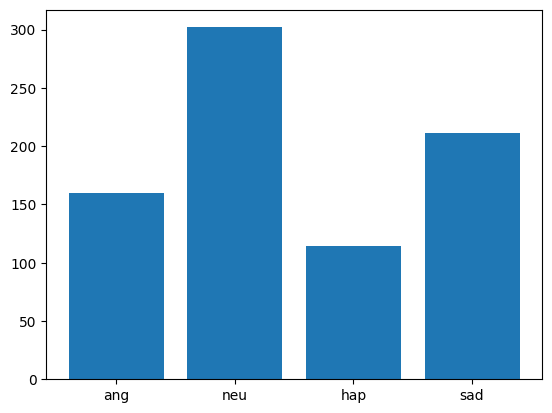

In [58]:
# Train dataset
move_audiofiles(text_wav_pairs, OUTPUT_DIR)
metadata_csv = items_to_metadata(text_wav_pairs)
metadata_csv.to_csv(
    "{0}/metadata.csv".format(OUTPUT_DIR),
    header=None,
    sep="|",
    index=False
)

# Eval dataset
text_wav_pairs_eval = get_transcriptions_and_wavfiles(TRANSCRIPTIONS_DIR.format(5), WAVS_DIR.format(5))
text_wav_pairs_eval = get_emo_evals(EMO_EVAL_DIR.format(5), text_wav_pairs_eval)
print(len(text_wav_pairs_eval))
text_wav_pairs_eval = filter_allowed_emos(text_wav_pairs_eval, ALLOWED_EMOS)
plot_emos_distribution(text_wav_pairs_eval)

move_audiofiles(text_wav_pairs_eval, OUTPUT_DIR_EVAL)
metadata_csv = items_to_metadata(text_wav_pairs_eval)
metadata_csv.to_csv(
    "{0}/metadata.csv".format(OUTPUT_DIR_EVAL),
    sep="|",
    header = None,
    index=False
)